# prima fase


In [ ]:
# from EMCost import *
# import pennylane as qlm
# from GHZModel import *
# jax.config.update("jax_enable_x64", True)

# num_input_qubits=2
# output_qubits=num_input_qubits
# n_trash_qubits=0
# operator_support=[1,2]
# operator_support_probs=[1., 1.]
# operator_translation_invariance_Q=False
# operator_support_max_range=[1, 5]

# set_global( num_input_qubits,
#             output_qubits,
#             n_trash_qubits,
#             operator_support,
#             operator_support_probs,
#             operator_translation_invariance_Q,
#             operator_support_max_range,
#             use_jax=False)

# dvc = qml.device('default.mixed', wires=num_input_qubits, shots=None)

# @qml.qnode(dvc,interface='jax')
# def trainer(w,dm):
#     qml.QubitDensityMatrix(dm, wires=dvc.wires)
#     return qml.state()
# input_states=[]

# res=[]
# X=[]
# u=5
# def get_basis(n):
#     a = [0]*(2**num_input_qubits)
#     a[n]=1
#     return jnp.array(a)

# input_states=get_GHZ_state_vector(num_input_qubits)
# inputs=jnp.conjugate(jnp.outer(input_states, input_states))
# # for i in range(2**num_input_qubits):
# # for i in range(0,2**num_input_qubits):
# #     a = [0]*(2**num_input_qubits)
# #     a[i]=1
# #     print(f'comparing b= [{list(map(int,(format(u, f'0{num_input_qubits}b'))))}] and a = [{list(map(int,(format(i, f'0{num_input_qubits}b'))))}]')

# #     b=jnp.array(a)
# #     b=jnp.outer(b, b)
# #     f =cost_fn_EM([b],trainer,[inputs])
# #     res.append((f'{list(map(int,(format(i,f'0{num_input_qubits}b'))))}',float(f([0]))))

# for i in range(0,100):
#     a=get_GHZ_state_vector(num_input_qubits,phase=jnp.pi/100*i)
#     print(f'comparing b= [{a}] and a = [{input_states}]')

#     b=jnp.array(a)
#     b=jnp.conjugate(jnp.outer(b, b))
#     f =cost_fn_EM([b],trainer,[inputs])
#     print(f(0))
#     res.append((f'{list(map(int,(format(i,f'0{num_input_qubits}b'))))}',float(f([0]))))


# # print(format(a,f'0{num_input_qubits}b'),format(b,f'0{num_input_qubits}b'))

# # cost_fn_EM(input_states,trainer,input_states)
# import pandas as pd 
# import matplotlib.pyplot as plt
# import seaborn as sns 
# df = pd.DataFrame(res, columns=['a', 'b'])

# # Plot using Seaborn
# plt.figure(figsize=(25, 20))
# sns.barplot(data=df, x='a', y='b', estimator=sum)  # Use sum, mean, etc. as needed
# plt.xticks(rotation=-75)

# # Label the axes
# plt.xlabel('Basisvb (a)')
# plt.ylabel('EM_distance (b)')
# plt.title('Plot of b against a')

# # Show the plot
# plt.show()


In [20]:
# a=get_GHZ_state_vector(2,phase=jnp.pi*3/4)
# sns.heatmap([a.real,a.imag])

# Seconda fase

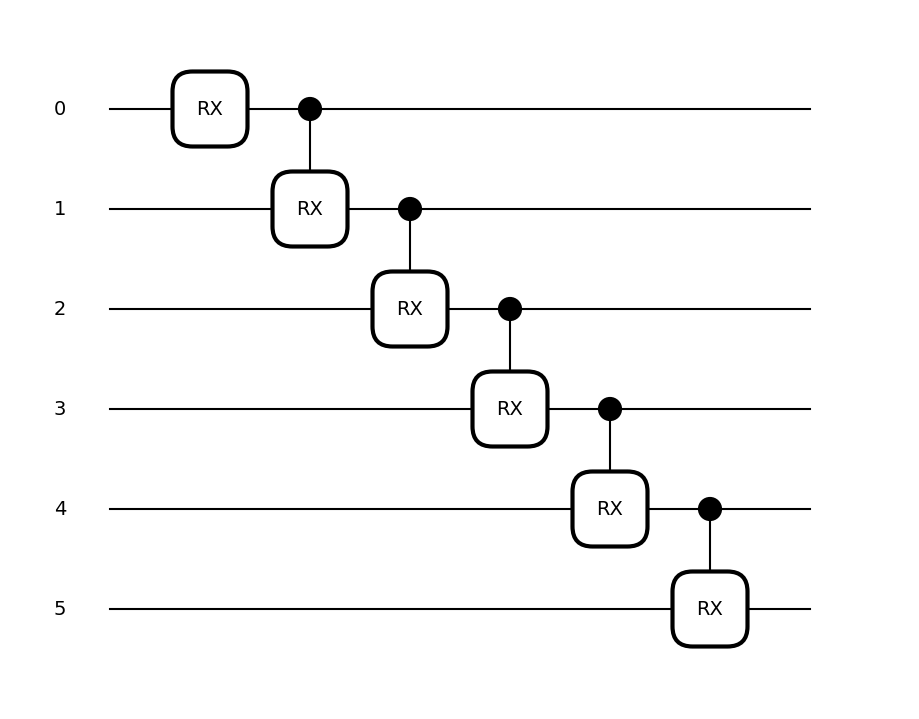

In [30]:
from GHZModel import *
from EMCost import *
import pennylane as qlm
jax.config.update("jax_enable_x64", True)
n_qubits=6
dvc = qml.device('default.mixed', wires=n_qubits, shots=None)
support=2
if support==3:
    operator_support=[1,2,3]
    operator_support_probs=[1., 1.]
    operator_support_max_range=[1, 5,3]
if support==2:
    operator_support=[1,2]
    operator_support_probs=[1., 1.]
    operator_support_max_range=[1, 5]
if support==1:
    operator_support=[1]
    operator_support_probs=[1.]
    operator_support_max_range=[1, ]

num_input_qubits=n_qubits
output_qubits=num_input_qubits
n_trash_qubits=0
# operator_support_probs=[1., 1.]
operator_translation_invariance_Q=False

set_global( num_input_qubits,
            output_qubits,
            n_trash_qubits,
            operator_support,
            operator_support_probs,
            operator_translation_invariance_Q,
            operator_support_max_range,
            use_jax=True)



model=GHZ(n_qubits,dvc,None)
model.plot_cirq()


In [31]:
stepsize=.2
opt = optax.adam(stepsize)
model.train(50,opt);

Epoch 50/50, 	Train Loss = 0.191540

---------------------------------------------------------------------------


(0.0, 2.566484282485436)

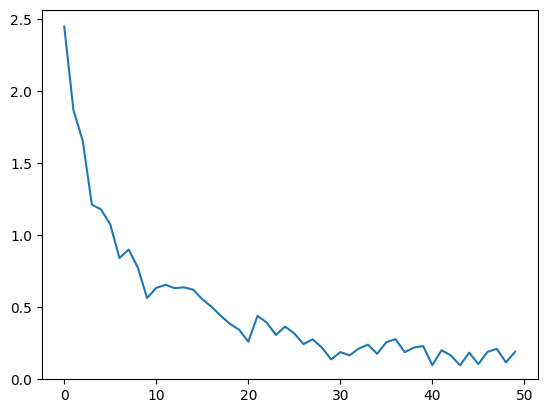

In [32]:
a= model.get_loss()
plt.plot(list(range(len(a))),a, label='train loss')
plt.ylim(0)


In [24]:
@qml.qnode(dvc)
def tmp():
    model.get_cirq(0)
    return qml.state()

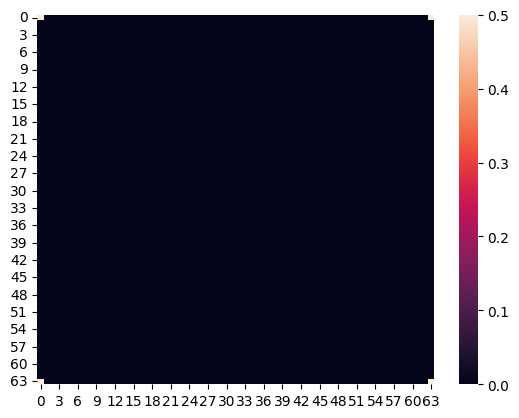

WireError: Did not find some of the wires Wires([1, 2]) on device with wires Wires([0, 1]).

In [34]:
import seaborn as sns 
sns.heatmap(get_GHZ_state_matrix(n_qubits).real)
plt.show()
sns.heatmap(tmp().imag)
plt.show()
sns.heatmap(tmp().real)


In [26]:
# Step 1: Check purity
purity = np.trace(np.dot(tmp(), tmp()))
print(f"Purity: {purity}")

if np.isclose(purity, 1):
    print("The state is pure.")
else:
    print("The state is mixed, a state vector cannot be uniquely obtained.")

# Step 2: Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(tmp())

# Step 3: Find the state vector
# Look for the eigenvector corresponding to eigenvalue ~1
state_vector = eigenvectors[:, np.isclose(eigenvalues, 1)]
state_vector = state_vector.flatten()  # Flatten to 1D array
# print(f"State Vector: {state_vector}")

Purity: (1.0000000000000002+0j)
The state is pure.


In [27]:
dist = numpy.linalg.norm(state_vector-get_GHZ_state_vector(n_qubits))
print(dist)

0.02659723373584128


<Axes: >

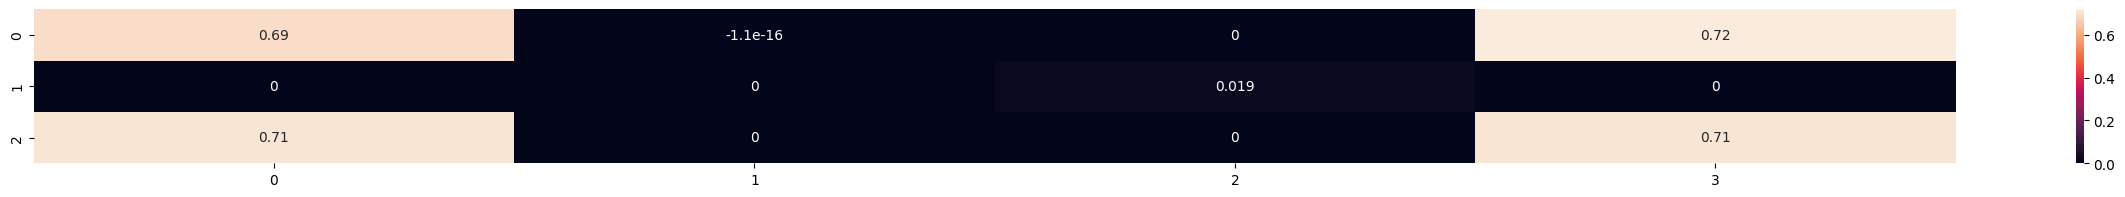

In [28]:
plt.figure(figsize=(31,2))
res=[state_vector.real,state_vector.imag,get_GHZ_state_vector(n_qubits).real]
sns.heatmap(res,annot=True)


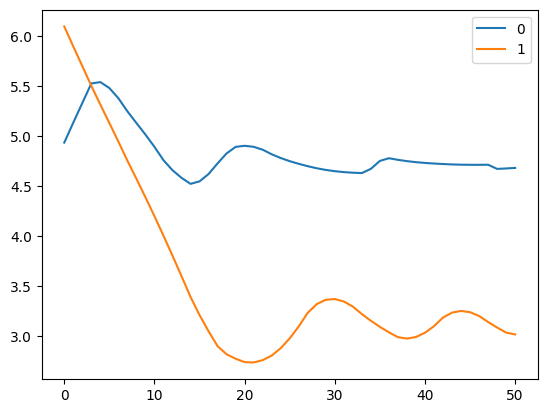

In [29]:
model.plot_weights()